In [62]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.utils.vis_utils import plot_model
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.0 MB/s eta 0:00:00


In [63]:
df = pd.read_csv('/content/avg_year_Solar_thermal.csv', delimiter=',')
df1= pd.read_csv('/content/Extreme_Summer_Solar_Thermal.csv', delimiter=',')
df

,Time,sum_Qdot_HIL3,sum_Qdot_solar_thermal,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Solar_Radiation_beam_normal,Solar_Radiation_diffuse_horizontal,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle,Temperature_Ambient
0,0,29144.26045,0.0000,114959.0624,100.000000,0.00000,91516.11678,144103.3228,100.000000,100.000000,...,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000,-2.70
1,600,29144.31318,19686.3507,114959.1677,110.082130,98297.03856,82306.83821,163789.8316,83.204914,102.733653,...,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000,-2.70
2,1200,29144.36590,0.0000,114959.2730,112.906383,172080.13540,109371.30690,144103.6389,77.552207,105.795387,...,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000,-2.70
3,1800,29144.41861,0.0000,114959.3783,113.052100,173760.54670,119266.05370,144103.7969,78.092746,107.088333,...,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000,-2.70
4,2400,29144.47130,0.0000,114959.4835,111.992615,168253.91280,122437.82060,144103.9548,78.776471,107.464147,...,0.0,0.0,0.0,0.0,98970.0,-15.000000,180.0,2.100000,150.960000,-2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52556,31533600,27085.69013,0.0000,107177.1565,111.493051,155349.44130,171861.21810,134262.8466,83.130035,111.061221,...,0.0,0.0,0.0,0.0,99470.0,-9.266667,360.0,1.366667,148.666667,-1.20
52557,31534200,27255.97883,0.0000,107878.2103,111.486861,156197.68840,172291.74140,135134.1891,83.048896,111.056101,...,0.0,0.0,0.0,0.0,99425.0,-9.850000,360.0,1.400000,149.335000,-1.35
52558,31534800,27426.26752,0.0000,108579.2641,111.479676,157045.94040,172752.79200,136005.5317,82.967700,111.050463,...,0.0,0.0,0.0,0.0,99380.0,-10.433333,360.0,1.433333,150.003333,-1.50
52559,31535400,27596.55620,0.0000,109280.3179,111.471562,157893.18150,173241.78970,136876.8741,82.886440,111.044116,...,0.0,0.0,0.0,0.0,99335.0,-11.016667,360.0,1.466667,150.671667,-1.65


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52561 entries, 0 to 52560
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time                                52561 non-null  int64  
 1   sum_Qdot_HIL3                       52561 non-null  float64
 2   sum_Qdot_solar_thermal              52561 non-null  float64
 3   sum_Qdot_HIL1                       52561 non-null  float64
 4   T_out_Boiler                        52561 non-null  float64
 5   Qdot_Storage_out                    52561 non-null  float64
 6   Qdot_boiler                         52561 non-null  float64
 7   Sum_Qdot_h_total                    52561 non-null  float64
 8   T_ret                               52561 non-null  float64
 9   T_sup                               52561 non-null  float64
 10  sensor_temperature                  52561 non-null  float64
 11  Azimuth_Angle                       52561

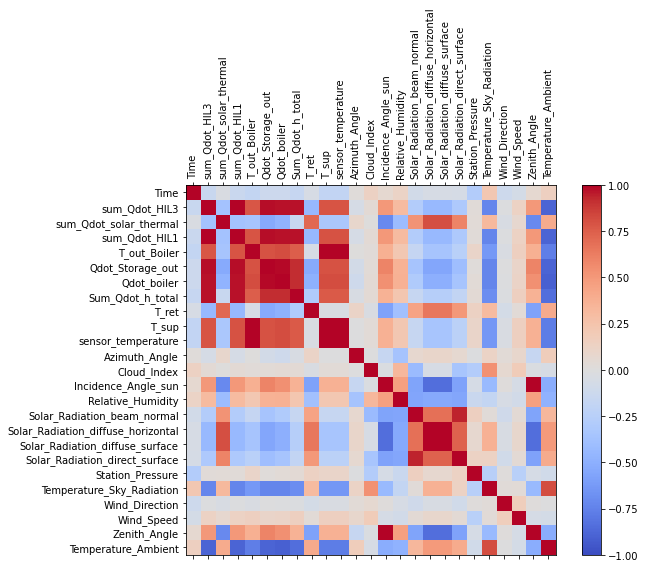

In [65]:
import numpy as np
corr=df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [66]:
df_input=df[['Qdot_Storage_out','sensor_temperature','Solar_Radiation_diffuse_horizontal', 'Temperature_Ambient',
             'Sum_Qdot_h_total']]
df1_input=df1[['Qdot_Storage_out','sensor_temperature','Solar_Radiation_diffuse_horizontal', 'Temperature_Ambient',
             'Sum_Qdot_h_total']]

In [67]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)
data_scaled_test=scaler.fit_transform(df1_input[40752:41904])
data_scaled

array([[0.12366316, 0.3580961 , 0.        , 0.17084282, 0.76981167],
       [0.49781944, 0.43574312, 0.        , 0.17084282, 0.8749786 ],
       [0.77866624, 0.5257542 , 0.        , 0.17084282, 0.76981336],
       ...,
       [0.72144032, 0.67965575, 0.        , 0.19817768, 0.72655261],
       [0.72466525, 0.6794714 , 0.        , 0.19476082, 0.7312074 ],
       [0.69599029, 0.6792614 , 0.        , 0.19134396, 0.73245927]])

In [68]:
features=data_scaled
target=data_scaled[:,0]
features_test=data_scaled_test
target_test=data_scaled_test[:,0]

In [69]:
target.shape

(52561,)

In [70]:
X_test,Y_test=(features_test, target_test)
x_train, y_train=(features, target)

In [71]:
win_length=144
batch_size=32
num_features=5
train_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(X_test, Y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [72]:
X_Train = []
Y_Train = []

const= 144
for i in range(const, x_train.shape[0]-const):
    
    X_Train.append(x_train[i-const:i])
    
    Y_Train.append(y_train[i])

# Convert into Numpy Array
X_train = np.array(X_Train)
Y_train = np.array(Y_Train)
print(X_train.shape)
print(Y_train.shape)

(52273, 144, 5)
(52273,)


In [73]:
X_Test = []
Y_Test = []

const= 144
for i in range(const, X_test.shape[0]-const):
    
    X_Test.append(X_test[i-const:i])
    
    Y_Test.append(Y_test[i])

# Convert into Numpy Array
x_test = np.array(X_Test)
y_test = np.array(Y_Test)
print(x_test.shape)
print(y_test.shape)

(864, 144, 5)
(864,)


In [74]:
X_train.shape[0]

52273

In [81]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(units=115, input_shape=(win_length,num_features), return_sequences=True))
  hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'LeakyRelu', 'elu'])
  model.add(tf.keras.layers.LSTM(units=115, return_sequences=True))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  
  learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001, 1e-4, 1e-5, 1e-6])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=tf.losses.MeanSquaredError(), metrics=['accuracy'])
  
  return model

In [82]:
import keras_tuner as kt

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        directory='my_dir',
                        max_trials=2)

In [83]:
tuner.search(X_train, Y_train, epochs=1, validation_data=(x_test, y_test))

In [84]:
tuner.get_best_hyperparameters()[0].values

{'activation': 'elu', 'learning_rate': 0.0001}

In [85]:
model=tuner.get_best_models(num_models=1)[0]

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 144, 115)          55660     
                                                                 
 lstm_1 (LSTM)               (None, 144, 115)          106260    
                                                                 
 dense (Dense)               (None, 144, 1)            116       
                                                                 
Total params: 162,036
Trainable params: 162,036
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=115, input_shape=(win_length,num_features), return_sequences=True, activation='elu'))
model.add(tf.keras.layers.LSTM(units=115, return_sequences=True,activation='elu'))
model.add(tf.keras.layers.LSTM(units=115, return_sequences=False,activation='elu'))
model.add(tf.keras.layers.Dense(1, activation='elu'))

In [ ]:
model.compile(loss=tf.losses.MeanSquaredError(), 
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.metrics.MeanSquaredError()])

history=model.fit(train_generator, epochs=20, 
                            validation_data=test_generator,
                            shuffle=False)

Epoch 1/20
1639/1639 [==============================] - 1034s 628ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 2/20
1639/1639 [==============================] - 1026s 626ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 3/20
1639/1639 [==============================] - 1026s 626ms/step - loss: 8.2084e-04 - mean_squared_error: 8.2084e-04 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 4/20
1639/1639 [==============================] - 1027s 627ms/step - loss: 6.6283e-04 - mean_squared_error: 6.6283e-04 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/20
1639/1639 [==============================] - 1028s 627ms/step - loss: 5.3992e-04 - mean_squared_error: 5.3992e-04 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 6/20
1639/1639 [==============================] - 1029s 628ms/step - loss: 4.4059e-04 - mean_squared_error: 4.4059e-04 - val_

In [ ]:
def model_build_layers(hp):

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(units=104, input_shape=(win_length,num_features), return_sequences=True, activation='relu'))
  for i in range(hp.Int('num_layers', min_value=1, max_value=8)):
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
    model.add(tf.keras.layers.LSTM(units=64, return_sequences=False, activation='relu'))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyRelu', 'elu'])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])

  model.add(tf.keras.layers.Dense(1))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.losses.MeanSquaredError(),
                metrics=['accuracy'])
  
  return model

In [ ]:
import keras_tuner as kt

tuner = kt.RandomSearch(model_build_layers,
                        objective='val_accuracy',
                        project_name='Layer_tuning',
                        directory='my_dir',
                        max_trials=3)

In [ ]:
tuner.search(X_train,Y_train, epochs=5, validation_data=(x_test, y_test))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
12                |?                 |units
5                 |?                 |num_layers
elu               |?                 |activation
1e-05             |?                 |learning_rate



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-24-5dc701f6a1fb>", line 6, in model_build_layers
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
    raise ValueError(f'Input {input_index} of layer "{layer_name}" '
ValueError: I

Invalid model 0/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-24-5dc701f6a1fb>", line 6, in model_build_layers
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
    raise ValueError(f'Input {input_index} of layer "{layer_name}" '
ValueError: I

Invalid model 1/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-24-5dc701f6a1fb>", line 6, in model_build_layers
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
    raise ValueError(f'Input {input_index} of layer "{layer_name}" '
ValueError: I

Invalid model 2/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-24-5dc701f6a1fb>", line 6, in model_build_layers
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
    raise ValueError(f'Input {input_index} of layer "{layer_name}" '
ValueError: I

Invalid model 3/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-24-5dc701f6a1fb>", line 6, in model_build_layers
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
    raise ValueError(f'Input {input_index} of layer "{layer_name}" '
ValueError: I

Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "<ipython-input-24-5dc701f6a1fb>", line 6, in model_build_layers
    model.add(tf.keras.layers.LSTM(units=72, return_sequences=True, activation='relu'))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 214, in assert_input_compatibility
    raise ValueError(f'Input {input_index} of layer "{layer_name}" '
ValueError: I

RuntimeError: ignored

In [ ]:
train_x = np.asarray(X_train)
train_y = np.asarray(Y_train)
validation_x = np.asarray(x_test)
validation_y = np.asarray(y_test)

In [87]:
def model_build(hp):
  model = tf.keras.Sequential()
  units=hp.Int('units', min_value=8, max_value=128, step=8)
  model.add(tf.keras.layers.LSTM(units=units, input_shape=(win_length,num_features), return_sequences=True, activation='relu'))
  model.add(tf.keras.layers.LSTM(units=units, return_sequences=True, activation='relu'))
  model.add(tf.keras.layers.LSTM(units=units, return_sequences=True, activation='relu'))
  model.add(tf.keras.layers.LSTM(units=units, return_sequences=True, activation='relu'))
  model.add(tf.keras.layers.LSTM(units=units, return_sequences=False))

  hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid', 'LeakyRelu', 'elu'])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])

  model.add(tf.keras.layers.Dense(1))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.losses.MeanSquaredError(),
                metrics=['accuracy'])
  
  return model

In [88]:
import keras_tuner as kt

tuner = kt.RandomSearch(model_build,
                        objective='val_accuracy',
                        project_name='LSTM_Hyperparameter_tuning',
                        directory='my_dir',
                        max_trials=5)

In [89]:
tuner.search(X_train, Y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 41m 32s]
val_accuracy: 0.002314814832061529

Best val_accuracy So Far: 0.002314814832061529
Total elapsed time: 04h 48m 42s


In [90]:
tuner.get_best_hyperparameters()[0].values

{'units': 40, 'activation': 'sigmoid', 'learning_rate': 1e-06}

In [91]:
model=tuner.get_best_models(num_models=1)[0]

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 144, 40)           7360      
                                                                 
 lstm_1 (LSTM)               (None, 144, 40)           12960     
                                                                 
 lstm_2 (LSTM)               (None, 144, 40)           12960     
                                                                 
 lstm_3 (LSTM)               (None, 144, 40)           12960     
                                                                 
 lstm_4 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 59,241
Trainable params: 59,241
Non-traina

In [ ]:
model.compile(loss=tf.losses.MeanSquaredError(), 
              optimizer=tf.optimizers.Adam(learning_rate=1e-6),
              metrics=[tf.metrics.MeanSquaredError()])

history=model.fit(train_generator, epochs=20, 
                            validation_data=test_generator,
                            shuffle=False)

Epoch 1/20
1308/1308 [==============================] - 788s 597ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 2/20
1308/1308 [==============================] - 777s 594ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 3/20
1308/1308 [==============================] - 775s 593ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 4/20
1308/1308 [==============================] - 777s 594ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 5/20
1308/1308 [==============================] - 772s 590ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 6/20
1308/1308 [==============================] - 771s 590ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0556 - val_mean_squared_error:

In [ ]:
model.evaluate(test_generator, verbose=0)

[0.0014114907244220376, 0.0014114907244220376]

In [ ]:
predictions=model.predict(test_generator)

32/32 [==============================] - 8s 221ms/step


In [ ]:
predictions

array([[0.6381242 ],
       [0.6442943 ],
       [0.65559816],
       ...,
       [0.71577907],
       [0.7169507 ],
       [0.717942  ]], dtype=float32)

In [ ]:
predictions.shape[0]

1008

In [ ]:
X_test[:,1:][win_length:]

array([[0.27901935, 0.        , 0.49655172, 0.56410683],
       [0.27824222, 0.        , 0.48735632, 0.56410968],
       [0.27816428, 0.        , 0.47816092, 0.56411252],
       ...,
       [0.87091468, 0.        , 0.0137931 , 0.59129338],
       [0.86965835, 0.        , 0.00689655, 0.59228423],
       [0.86798134, 0.        , 0.        , 0.59327508]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])],axis=1)
df_pred

,0,0,1,2,3
0,0.638124,0.279019,0.0,0.496552,0.564107
1,0.644294,0.278242,0.0,0.487356,0.564110
2,0.655598,0.278164,0.0,0.478161,0.564113
3,0.661105,0.277612,0.0,0.468966,0.564115
4,0.661570,0.275941,0.0,0.459770,0.564118
...,...,...,...,...,...
1003,0.706707,0.870663,0.0,0.027586,0.589312
1004,0.712894,0.871300,0.0,0.020690,0.590303
1005,0.715779,0.870915,0.0,0.013793,0.591293
1006,0.716951,0.869658,0.0,0.006897,0.592284


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[7.72795608e+04, 9.12145611e+01, 0.00000000e+00, 9.60000000e+00,
        6.73279065e+04],
       [7.81259468e+04, 9.12096240e+01, 0.00000000e+00, 9.46666667e+00,
        6.73281851e+04],
       [7.96765576e+04, 9.12091288e+01, 0.00000000e+00, 9.33333333e+00,
        6.73284636e+04],
       ...,
       [8.79319059e+04, 9.49749556e+01, 0.00000000e+00, 2.60000000e+00,
        6.99917621e+04],
       [8.80926274e+04, 9.49669739e+01, 0.00000000e+00, 2.50000000e+00,
        7.00888502e+04],
       [8.82286075e+04, 9.49563197e+01, 0.00000000e+00, 2.40000000e+00,
        7.01859383e+04]])

In [ ]:
df_final=df1_input[40896:41904]

In [ ]:
df_final.count()

Qdot_Storage_out                      1008
sensor_temperature                    1008
Solar_Radiation_diffuse_horizontal    1008
Temperature_Ambient                   1008
Sum_Qdot_h_total                      1008
dtype: int64

In [ ]:
df_final['Qdot_pred']=rev_trans[:,0]

<ipython-input-48-8496debdf6f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Qdot_pred']=rev_trans[:,0]


In [ ]:
df_final

,Qdot_Storage_out,sensor_temperature,Solar_Radiation_diffuse_horizontal,Temperature_Ambient,Sum_Qdot_h_total,Qdot_pred
40896,82385.03165,91.214561,0.0,9.600000,67327.90655,77279.560776
40897,84668.33254,91.209624,0.0,9.466667,67328.18509,78125.946810
40898,84995.73479,91.209129,0.0,9.333333,67328.46364,79676.557554
40899,85007.93909,91.205617,0.0,9.200000,67328.74220,80431.925018
40900,84969.78890,91.195003,0.0,9.066667,67329.02077,80495.741039
...,...,...,...,...,...,...
41899,88296.86566,94.973357,0.0,2.800000,69797.58598,86687.440355
41900,88489.48096,94.977404,0.0,2.700000,69894.67404,87536.205693
41901,88554.10048,94.974956,0.0,2.600000,69991.76211,87931.905902
41902,88610.42270,94.966974,0.0,2.500000,70088.85019,88092.627429


In [ ]:
df_final[['Qdot_Storage_out','Qdot_pred']]

,Qdot_Storage_out,Qdot_pred
40896,82385.03165,77279.560776
40897,84668.33254,78125.946810
40898,84995.73479,79676.557554
40899,85007.93909,80431.925018
40900,84969.78890,80495.741039
...,...,...
41899,88296.86566,86687.440355
41900,88489.48096,87536.205693
41901,88554.10048,87931.905902
41902,88610.42270,88092.627429


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mape=mean_absolute_error(df_final['Qdot_pred'], df_final['Qdot_Storage_out'])
rmse=sqrt(mean_squared_error(df_final['Qdot_pred'], df_final['Qdot_Storage_out']))
rmse

5153.65975029334

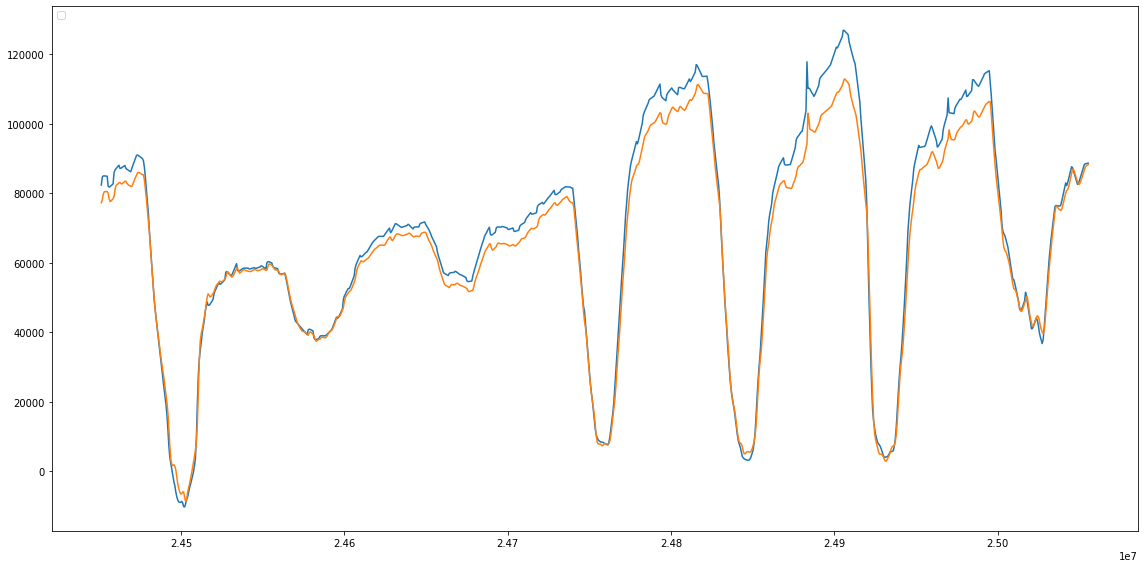

In [ ]:
fig=plt.figure(figsize=(16,8))
plt.rcParams["figure.autolayout"] = True
x=df1['Time'].loc[40752:41759]
y=df_final['Qdot_Storage_out']
y1=df_final['Qdot_pred']
plt.legend(loc="upper left")
plt.plot(x,y,label='Actual Qdot')
plt.plot(x,y1,label='LSTM Model Predictions')
plt.show()